In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import false_discovery_control
from sklearn.metrics import roc_auc_score
import pandas as pd
import random
import matplotlib.pyplot as plt
from rdkit import Chem
import math

In [2]:
# Nature-style rcParams
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial'],
    'font.size': 8,
    'axes.linewidth': 0.5,
    'axes.labelsize': 9,
    'axes.titlesize': 9,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'xtick.major.size': 3,
    'ytick.major.size': 3,
    'xtick.minor.size': 1.5,
    'ytick.minor.size': 1.5,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'legend.fontsize': 8,
    'figure.dpi': 300,
    'savefig.dpi': 600,
    'axes.spines.top': False,
    'axes.spines.right': False,
})

In [3]:
with open("FinalBDBPredTrain.txt", "r") as file:
    txt = file.read()
    lines = txt.split("\n")

In [4]:
trainligands = [eval(lines[i]) + eval(lines[i+1]) for i in range(1, len(lines), 7)]

In [5]:
names = lines[::7]

In [6]:
obdb = pd.read_csv(f"FinalBDBPred.csv")

In [7]:
adlifts = []
adAUCs = []
for j, name in enumerate(names):
    bdb = obdb.drop(trainligands[j])

    bdb_classes = bdb["Sub_Class"].tolist()
    bdb_types = set(bdb_classes)
    bdb_class_to_indices = {x:list() for x in bdb_types}
    for i, val in enumerate(bdb_classes):
        bdb_class_to_indices[val].append(i)
    bdb_counts = {x:len(y) for x, y in bdb_class_to_indices.items()}

    cutoff = len(bdb_classes) // 100
    prediction = bdb[name].tolist()
    correct = len([x for x in sorted(range(len(bdb_classes)), key=lambda i: prediction[i])[-cutoff:] if bdb_classes[x] == name])
    
    adlifts.append((name, correct*len(bdb_classes)/(cutoff*len(bdb_class_to_indices[name]))))
    adAUCs.append((name, roc_auc_score([1 if x == name else 0 for x in bdb["Sub_Class"]], bdb[name])))

In [8]:
sorted(adlifts, key=lambda x: -x[1])

[('ACC2', 55.06716729244889),
 ('USP30', 52.78995360742281),
 ('Bile acid receptor', 52.15647416413374),
 ('Glucose-dependent insulinotropic receptor', 45.1354103343465),
 ('NAMPT', 35.40032183086),
 ('Diacylglycerol O-acyltransferase', 32.53002546619568),
 ('CA2', 26.16545526628783),
 ('MCH1', 23.258182458922516),
 ('APP', 21.940824468085108),
 ('Peroxisome', 21.804546055239857),
 ('CYP19A1', 21.21750058452186),
 ('F10', 19.475905214388998),
 ('Neutrophil collagenase', 19.104935591257778),
 ('ESR1', 18.627312201476336),
 ('FFAR', 17.443636844191886),
 ('HRH3', 17.3181430539459),
 ('HDAC3', 17.110155551582334),
 ('Substance-P', 16.716818642350557),
 ('MMP1', 16.328055418109848),
 ('MMP9', 16.26501273309784),
 ('LRRK2', 15.430909516015898),
 ('P2RX7', 15.2631822386679),
 ('S1PRs', 15.2631822386679),
 ('MMP2', 14.817180160265266),
 ('CA12', 14.523208956250258),
 ('HDAC1', 14.328701693443335),
 ('nAChR', 14.328701693443335),
 ('MGL', 14.042127659574469),
 ('SLC6A2', 13.473256816222838),
 

In [9]:
len([x for x in adlifts if x[1] > 10])

42

In [9]:
len(obdb["11B-HSD1"])

33099

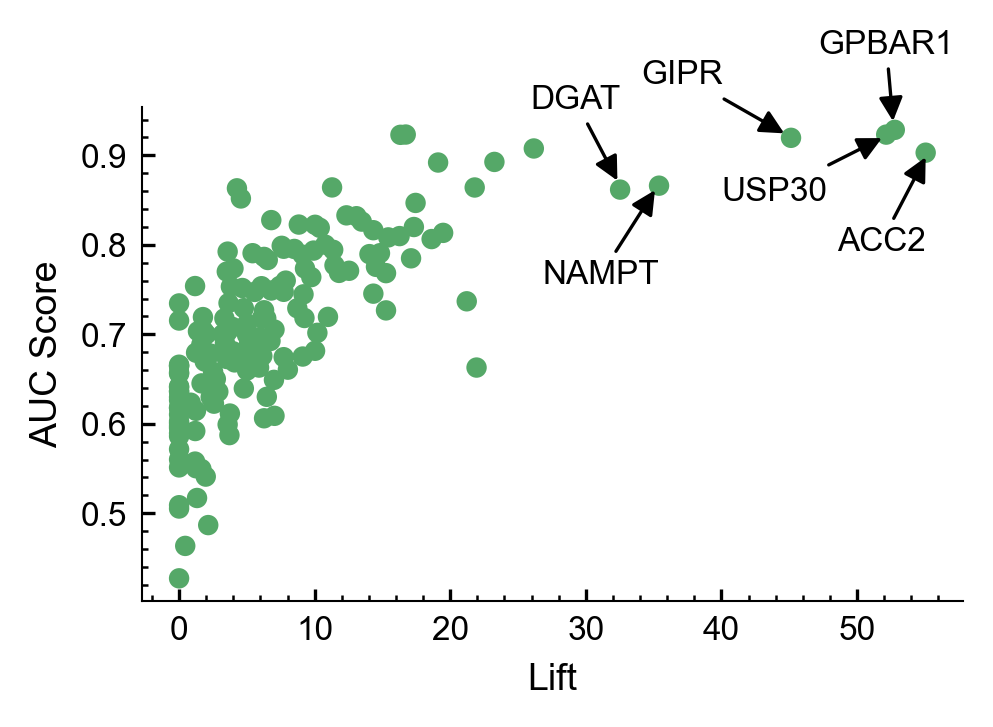

In [10]:
# Set figure size to single column width (inches)
fig, ax = plt.subplots(figsize=(3.35, 2.5))

# Scatter plot with Nature-style marker
ax.scatter([x[1] for x in adlifts], [x[1] for x in adAUCs], 
           s=24, c='#55A868', edgecolors='none', zorder=2)

# Axis labels
ax.set_xlabel("Lift", labelpad=4)
ax.set_ylabel("AUC Score", labelpad=4)

# Minor ticks
ax.minorticks_on()

# Remove top/right spines (redundant with rcParams, but explicit here)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Annotation with Nature-style arrow
for i, name in enumerate(names):
    if adlifts[i][0] == "USP30":
        ax.annotate(
            name,
            xy=(adlifts[i][1] - 0.4, adAUCs[i][1] - 0.005),
            xytext=(adlifts[i][1]-5, adAUCs[i][1] - 0.07),
            arrowprops=dict(
                arrowstyle='-|>',
                color='black',
                lw=0.8,
                shrinkA=2,  # space at arrow tip
                shrinkB=2,  # space at text
                mutation_scale=12  # arrowhead size
            ),
            fontsize=8,
            fontname='Arial',
            va='center',
            ha='right'
        )
    elif adlifts[i][0] == "ACC2":
        ax.annotate(
            name,
            xy=(adlifts[i][1], adAUCs[i][1] - 0.005),
            xytext=(adlifts[i][1], adAUCs[i][1] - 0.1),
            arrowprops=dict(
                arrowstyle='-|>',
                color='black',
                lw=0.8,
                shrinkA=0,
                shrinkB=0,
                mutation_scale=12
            ),
            fontsize=8,
            fontname='Arial',
            va='center',
            ha='right'
        )
    elif adlifts[i][0] == "NAMPT":
        ax.annotate(
            name,
            xy=(adlifts[i][1]-.3, adAUCs[i][1] - 0.005),
            xytext=(adlifts[i][1], adAUCs[i][1] - 0.1),
            arrowprops=dict(
                arrowstyle='-|>',
                color='black',
                lw=0.8,
                shrinkA=0,
                shrinkB=0,
                mutation_scale=12
            ),
            fontsize=8,
            fontname='Arial',
            va='center',
            ha='right'
        )
    elif adlifts[i][0] == "Diacylglycerol O-acyltransferase":
        ax.annotate(
            "DGAT",
            xy=(adlifts[i][1]-.2, adAUCs[i][1] + 0.01),
            xytext=(adlifts[i][1], adAUCs[i][1] + 0.1),
            arrowprops=dict(
                arrowstyle='-|>',
                color='black',
                lw=0.8,
                shrinkA=0,
                shrinkB=0,
                mutation_scale=12
            ),
            fontsize=8,
            fontname='Arial',
            va='center',
            ha='right'
        )
    elif adlifts[i][1] > 50:
        ax.annotate(
            "GPBAR1",
            xy=(adlifts[i][1]+0.5, adAUCs[i][1] + 0.015),
            xytext=(adlifts[i][1]+5, adAUCs[i][1] + 0.1),
            arrowprops=dict(
                arrowstyle='-|>',
                color='black',
                lw=0.8,
                shrinkA=0,
                shrinkB=0,
                mutation_scale=12
            ),
            fontsize=8,
            fontname='Arial',
            va='center',
            ha='right'
        )
    elif adlifts[i][1] > 40:
        ax.annotate(
            "GIPR",
            xy=(adlifts[i][1]-.5, adAUCs[i][1] + 0.005),
            xytext=(adlifts[i][1]-5, adAUCs[i][1] + 0.07),
            arrowprops=dict(
                arrowstyle='-|>',
                color='black',
                lw=0.8,
                shrinkA=0,
                shrinkB=0,
                mutation_scale=12
            ),
            fontsize=8,
            fontname='Arial',
            va='center',
            ha='right'
        )
# Tight layout for better spacing
plt.tight_layout()

# Show or save the figure
plt.show()

In [10]:
bindPs = []
nonbindPs = []
for j, name in enumerate(names):
    bdb = obdb.drop(trainligands[j])
    Ps = bdb[name].tolist()
    trueclass = bdb["Sub_Class"].tolist()
    bindPs.append([Ps[x] for x in range(len(Ps)) if trueclass[x] == name])
    nonbindPs.append([Ps[x] for x in range(len(Ps)) if trueclass[x] != name])

In [11]:
delta_means = []
p_values = []
for i in range(len(bindPs)):
    delta_means.append(np.mean(bindPs[i]) - np.mean(nonbindPs[i]))
    _, p_value_greater = stats.mannwhitneyu(bindPs[i], nonbindPs[i], alternative='greater')
    p_values.append(p_value_greater)

In [12]:
adj_p_values = false_discovery_control(p_values, method='bh')
nlog_adj_p_values = [-math.log10(p) for p in adj_p_values]

In [13]:
len([x for x in adj_p_values if x < 0.05])

150

In [14]:
sorted([(names[i], adlifts[i][1]) for i in range(len(delta_means))], key=lambda x:-x[1])

[('ACC2', 55.06716729244889),
 ('USP30', 52.78995360742281),
 ('Bile acid receptor', 52.15647416413374),
 ('Glucose-dependent insulinotropic receptor', 45.1354103343465),
 ('NAMPT', 35.40032183086),
 ('Diacylglycerol O-acyltransferase', 32.53002546619568),
 ('CA2', 26.16545526628783),
 ('MCH1', 23.258182458922516),
 ('APP', 21.940824468085108),
 ('Peroxisome', 21.804546055239857),
 ('CYP19A1', 21.21750058452186),
 ('F10', 19.475905214388998),
 ('Neutrophil collagenase', 19.104935591257778),
 ('ESR1', 18.627312201476336),
 ('FFAR', 17.443636844191886),
 ('HRH3', 17.3181430539459),
 ('HDAC3', 17.110155551582334),
 ('Substance-P', 16.716818642350557),
 ('MMP1', 16.328055418109848),
 ('MMP9', 16.26501273309784),
 ('LRRK2', 15.430909516015898),
 ('P2RX7', 15.2631822386679),
 ('S1PRs', 15.2631822386679),
 ('MMP2', 14.817180160265266),
 ('CA12', 14.523208956250258),
 ('HDAC1', 14.328701693443335),
 ('nAChR', 14.328701693443335),
 ('MGL', 14.042127659574469),
 ('SLC6A2', 13.473256816222838),
 

In [15]:
sorted([(names[i], delta_means[i]) for i in range(len(delta_means))], key=lambda x:-x[1])

[('MMP1', 0.6569780832974432),
 ('Glucose-dependent insulinotropic receptor', 0.573926232388015),
 ('Substance-P', 0.5706816405290334),
 ('Bile acid receptor', 0.5578113108895948),
 ('MCH1', 0.5428960487751702),
 ('Neutrophil collagenase', 0.529781571022991),
 ('ACC2', 0.5287983379003884),
 ('CA2', 0.5227540647777092),
 ('USP30', 0.5053670895067732),
 ('Peroxisome', 0.4697457472286306),
 ('Sigma intracellular receptor 2', 0.4642839000171247),
 ('PDE10A', 0.46163405603202623),
 ('Stromelysin', 0.44605618672139347),
 ('FFAR', 0.44066509452823044),
 ('SIGMAR1', 0.43761970246904525),
 ('DRD2', 0.4252764739552466),
 ('NAMPT', 0.4193427461012298),
 ('Diacylglycerol O-acyltransferase', 0.413868212603946),
 ('HRH1', 0.4129028729952702),
 ('MMP9', 0.4113665026285324),
 ('HDAC1', 0.403015293642624),
 ('SLC6A2', 0.40195441222364325),
 ('Prostaglandin Receptor', 0.40139508888202946),
 ('Serine/threonine-protein kinase mTOR', 0.39284793224905146),
 ('HRH3', 0.38839834732849093),
 ('11B-HSD1', 0.378

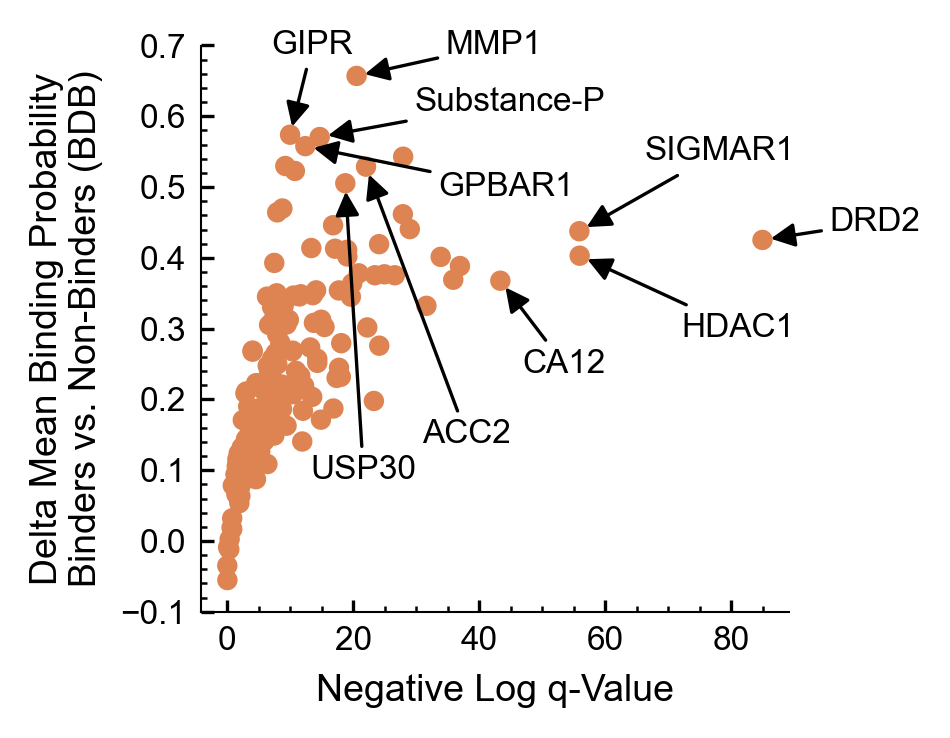

In [19]:
# Figure size for single column (Nature)
fig, ax = plt.subplots(figsize=(3.35, 2.5))

# Scatter plot
ax.scatter(nlog_adj_p_values, delta_means, color="#DD8452", s=24, edgecolors='none', zorder=2)

# Axis labels
ax.set_xlabel("Negative Log q-Value", labelpad=4)
ax.set_ylabel("Delta Mean Binding Probability\nBinders vs. Non-Binders (BDB)", labelpad=4)
ax.set_ylim((-0.1, 0.7))

# Minor ticks
ax.minorticks_on()

# Remove top/right spines (redundant with rcParams, but explicit)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

altnames = {"Glucose-dependent insulinotropic receptor": "GIPR", "Bile acid receptor": "GPBAR1"}
# Adjusted Annotations with more spacing to reduce overlap
for i, name in enumerate(names):
    if delta_means[i] > 0.55 or nlog_adj_p_values[i] > 40 or name in ("USP30", "ACC2"):
        offsets = {"ACC2":(45, 0.15), "USP30":(30,0.1), "Glucose-dependent insulinotropic receptor":(20, 0.7), "Bile acid receptor": (55, 0.5), "Substance-P": (60, 0.62), "MMP1": (50, 0.7), "HDAC1": (90, 0.3), "SIGMAR1": (90, 0.55), "DRD2": (110, 0.45), "CA12": (60, 0.25)}
        
        ax.annotate(
            altnames[name] if name in altnames else name, xy=(nlog_adj_p_values[i], delta_means[i]), xytext=offsets[name], arrowprops=dict(
                arrowstyle='-|>', color='black', lw=0.8, shrinkA=0, shrinkB=2, mutation_scale=12
            ), fontsize=8, fontname='Arial', va='center',ha='right')
plt.tight_layout()
plt.show()

In [16]:
[x for x in [y[0] for y in sorted(adlifts, key=lambda z:-z[1])[:6]]]

['ACC2',
 'USP30',
 'Bile acid receptor',
 'Glucose-dependent insulinotropic receptor',
 'NAMPT',
 'Diacylglycerol O-acyltransferase']

In [17]:
data = [bindPs[97], nonbindPs[97], bindPs[122], nonbindPs[122], bindPs[142], nonbindPs[142], bindPs[156], nonbindPs[156], bindPs[68], nonbindPs[68], bindPs[124], nonbindPs[124]]
kernels = [stats.gaussian_kde(x) for x in data]
print("kernels")
densities = [kernels[i](data[i]) for i in range(len(data))]

kernels


In [18]:
maxes = [max(x) for x in densities]
spreads = [np.array([x/maxes[i] for x in densities[i]]) for i in range(len(data))]

/var/folders/y_/2d6q3v617qj78nxjx8b1_2wc0000gn/T/ipykernel_25746/292101005.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(


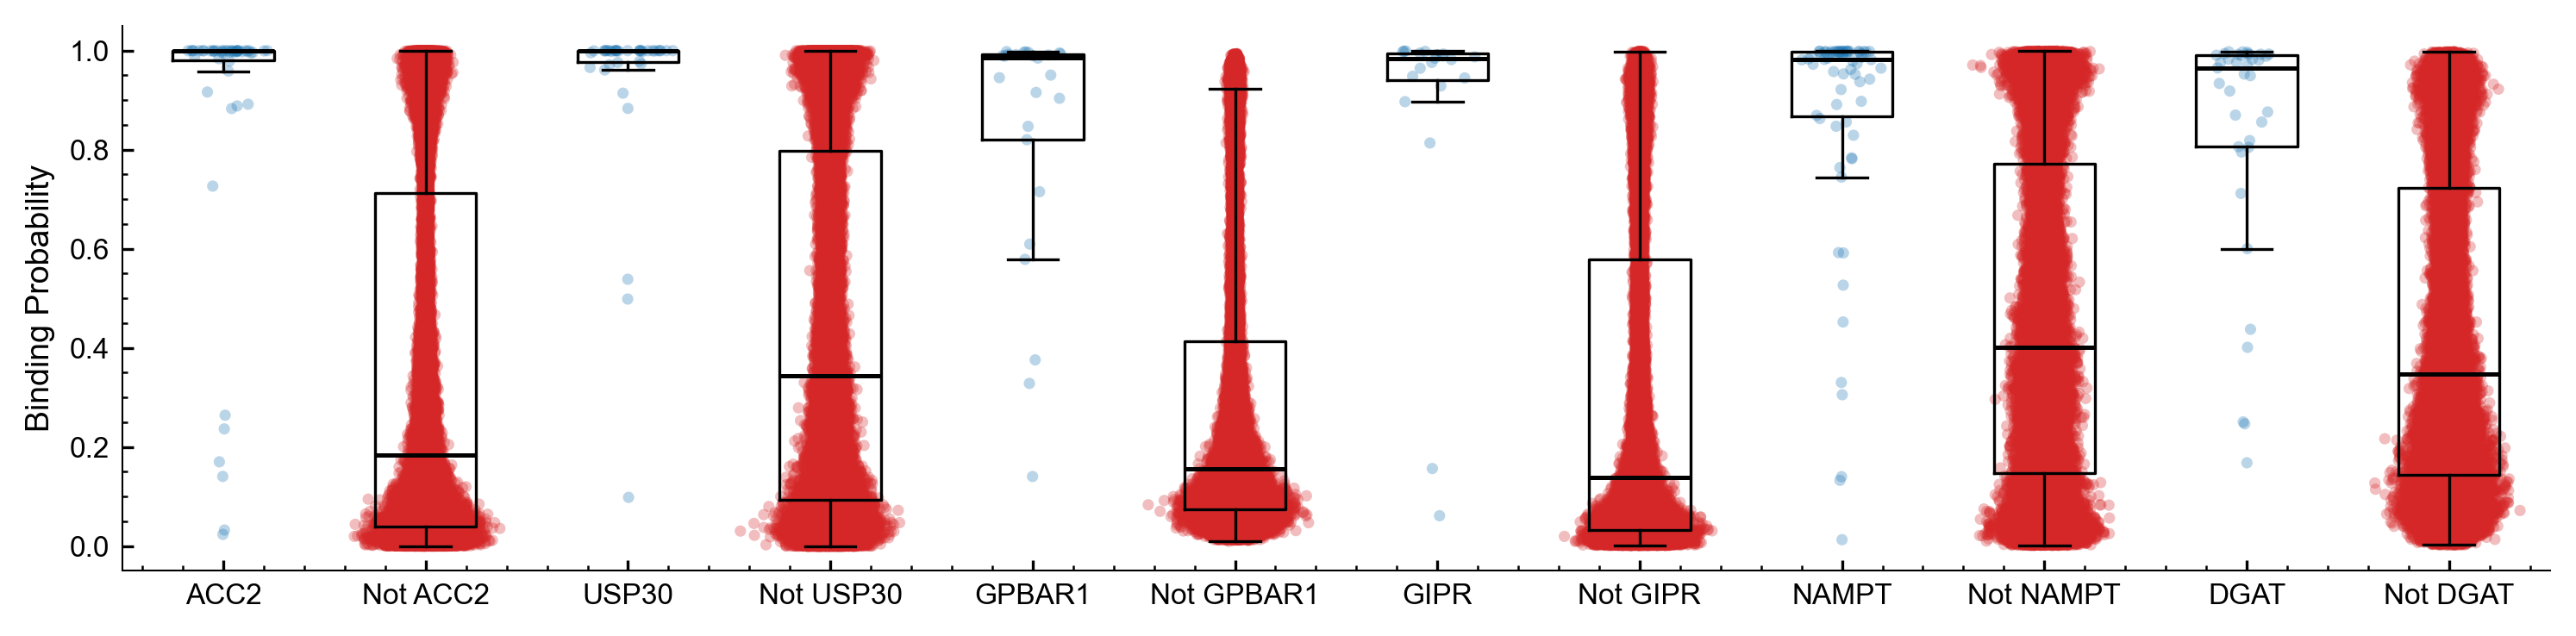

In [19]:
labels=["ACC2", "Not ACC2", "USP30", "Not USP30", "GPBAR1", "Not GPBAR1", "GIPR", "Not GIPR", "NAMPT", "Not NAMPT", "DGAT", "Not DGAT"]
fig, ax = plt.subplots(figsize=(10, 2.5))

# Boxplot with higher zorder
bp = ax.boxplot(
    data,
    labels=labels,
    showfliers=False,
    boxprops=dict(linewidth=0.8, color='black', zorder=3),
    whiskerprops=dict(linewidth=0.8, color='black', zorder=3),
    capprops=dict(linewidth=0.8, color='black', zorder=3),
    medianprops=dict(linewidth=1.2, color='black', zorder=3),
    widths=0.5
)

# Scatter points with lower zorder
point_colors = ['#1f77b4', '#d62728']
for i, group_data in enumerate(data):
    #x = np.random.normal(i+1, 0.06, size=len(group_data))
    x = np.random.normal(0, 0.1, size=len(group_data)) * spreads[i] + np.ones(len(group_data)) * (i+1)
    ax.scatter(
        x, group_data,
        color=point_colors[i % 2],
        alpha=0.3,
        s=10,
        edgecolors='none',
        zorder=2
    )

ax.set_ylabel("Binding Probability", labelpad=4)
ax.minorticks_on()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

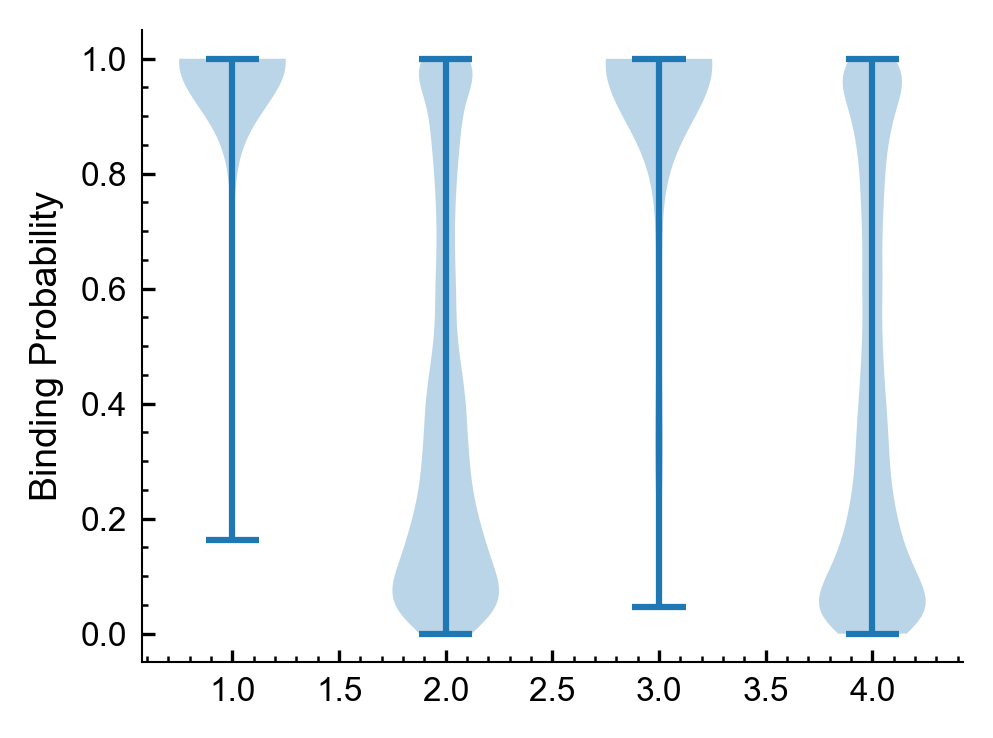

In [19]:
data = [bindPs[118], nonbindPs[118], bindPs[142], nonbindPs[142]]
labels=["USP30", "Not USP30", "ACC2", "Not ACC2"]
fig, ax = plt.subplots(figsize=(3.35, 2.5))

# Boxplot with higher zorder
bp = ax.violinplot(
    data
)

ax.set_ylabel("Binding Probability", labelpad=4)
ax.minorticks_on()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

/var/folders/y_/2d6q3v617qj78nxjx8b1_2wc0000gn/T/ipykernel_31182/974037241.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data,labels=labels, showfliers=False)


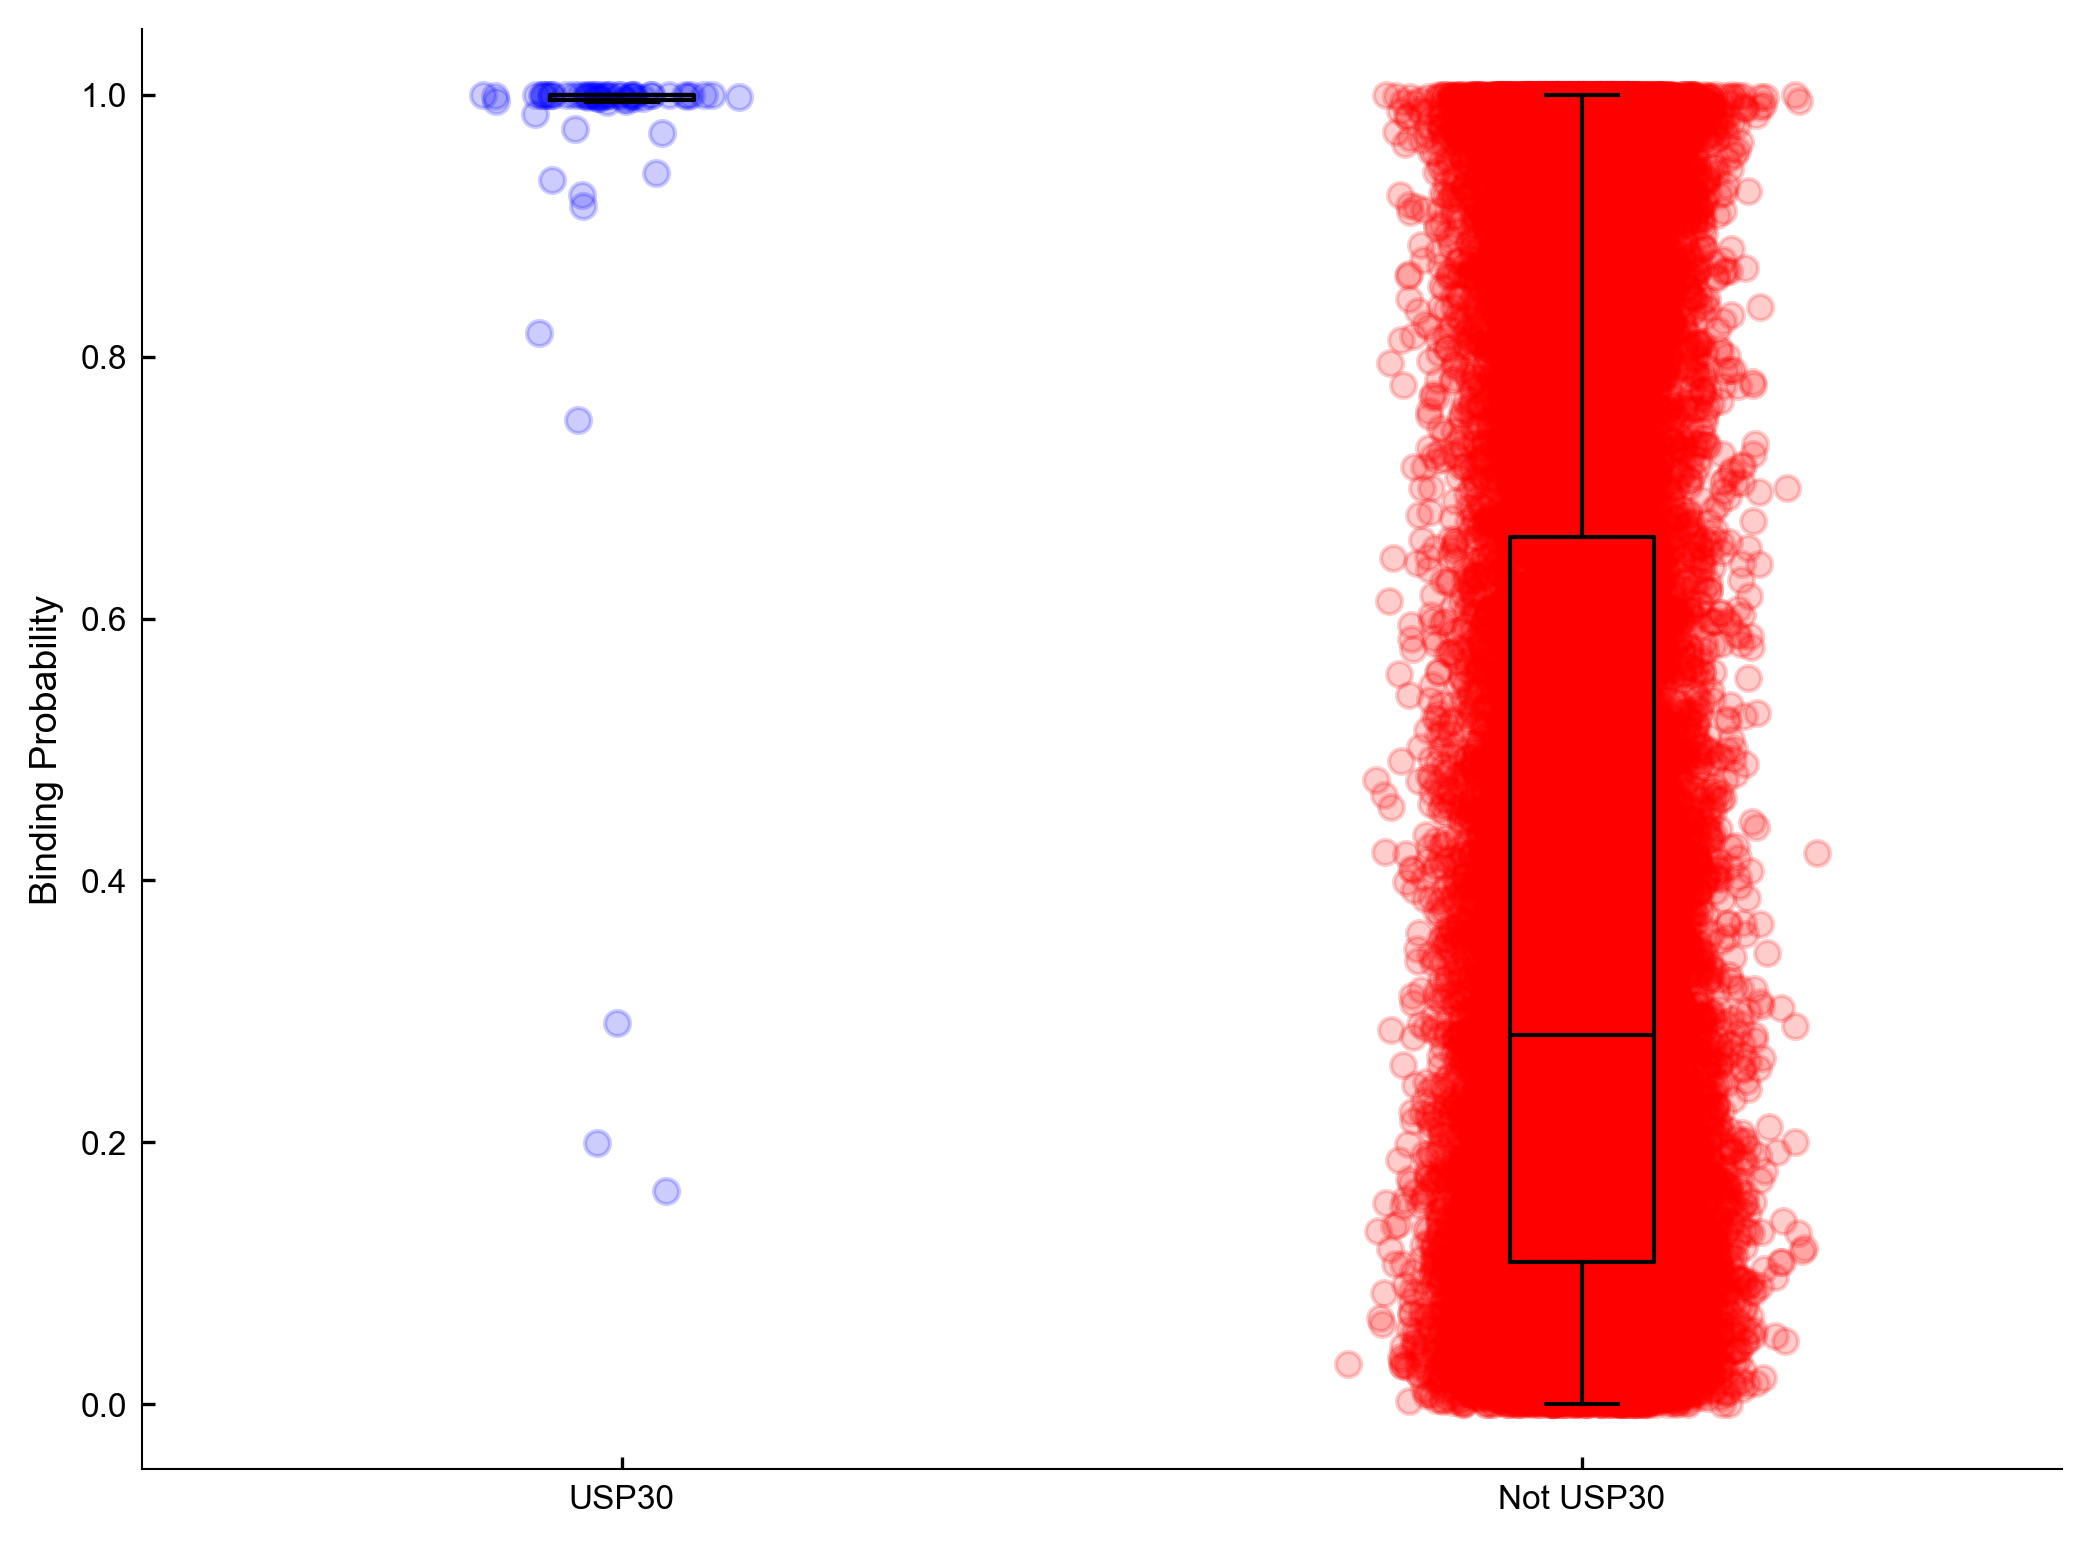

In [20]:
id = 118
data = [bindPs[id], nonbindPs[id]]
labels = [names[id], "Not "+names[id]]
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data,labels=labels, showfliers=False)
for median in bp['medians']:
    median.set(color='black', linewidth=1)
plt.ylabel("Binding Probability")
for i, group_data in enumerate(data):
    # Calculate a small random offset for each point to avoid overlap
    x = np.random.normal(i+1, 0.06, size=len(group_data))
    ax.scatter(x, group_data, color='blue' if i%2==0 else'red', alpha=0.2)
plt.show()

In [21]:
p_values[118]

1.1509439115758246e-32